<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT9_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.datasets import cifar100
(train_images, train_lables),(test_images, test_lables) = cifar100.load_data()

In [ ]:
print(train_images.shape)
print(test_images.shape)
print(train_lables.shape)
print(test_lables.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
print(train_images[0])
print(train_lables[:10])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]
[[19]
 [29]
 [ 0]
 [11]
 [ 1]
 [86]
 [90]
 [28]
 [23]
 [31]]


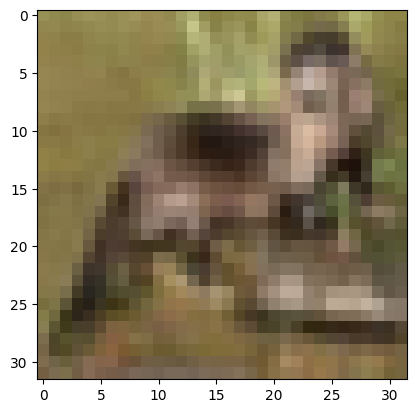

In [ ]:
import matplotlib.pyplot as plt
hinh = train_images[100]
plt.imshow(hinh,cmap = 'gray')
plt.show()

In [ ]:
from tensorflow.python import summary
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1024, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(100, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 100)               12900     
                                                                 
Total params: 3,848,676
Trainable params: 3,848,676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 32*32*3))
test_images = test_images.astype('float32')/255
test_images.shape

(10000, 3072)

In [ ]:
from keras.utils import to_categorical
train_lables = to_categorical(train_lables, 100)
test_lables = to_categorical(test_lables, 100)

In [ ]:
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_lables, epochs = 50, batch_size = 128)
test_loss, test_acc = model.evaluate(test_images, test_lables)
print(test_acc)
print(test_loss)

Epoch 1/50
391/391 [==============================] - 32s 81ms/step - loss: 3.0683 - accuracy: 0.2460
Epoch 2/50
391/391 [==============================] - 32s 82ms/step - loss: 2.9910 - accuracy: 0.2600
Epoch 3/50
391/391 [==============================] - 32s 81ms/step - loss: 2.9299 - accuracy: 0.2699
Epoch 4/50
391/391 [==============================] - 34s 86ms/step - loss: 2.8702 - accuracy: 0.2824
Epoch 5/50
391/391 [==============================] - 34s 87ms/step - loss: 2.8107 - accuracy: 0.2926
Epoch 6/50
391/391 [==============================] - 31s 81ms/step - loss: 2.7513 - accuracy: 0.3060
Epoch 7/50
391/391 [==============================] - 32s 82ms/step - loss: 2.6961 - accuracy: 0.3170
Epoch 8/50
391/391 [==============================] - 31s 80ms/step - loss: 2.6361 - accuracy: 0.3302
Epoch 9/50
391/391 [==============================] - 31s 81ms/step - loss: 2.5834 - accuracy: 0.3402
Epoch 10/50
391/391 [==============================] - 33s 84ms/step - loss: 2.522

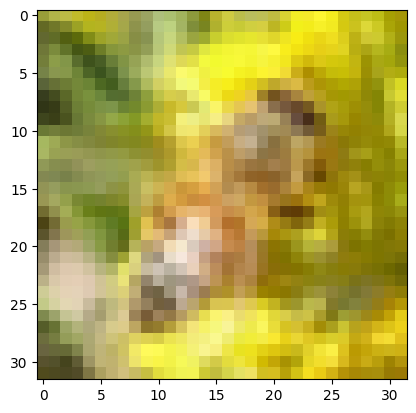

6
1/1 [==============================] - 0s 38ms/step
38


In [ ]:
import numpy as np
from PIL import Image

#result = np.array(['airplane', 'auto', 'brid', 'cat', 'deer', 'dog', 'frog', 'house', 'ship', 'truck'])

(train_images1, train_lables1),(test_images1, test_lables1) = cifar100.load_data()

hinh_position = 200
hinh = test_images1[hinh_position]
#hinh = Image.open("test.jpg")
#print(hinh.size)
hinh_lable = test_lables1[hinh_position]

plt.imshow(hinh,cmap = 'gray')
plt.show()

#hinh = np.array(hinh)
#print(hinh.shape)


hinh = hinh.reshape((1, 32*32*3))
hinh = hinh.astype('float32')/255


#print(result[hinh_lable[0]])
print(hinh_lable[0])


y= model.predict(hinh)

index_max = np.argmax(y[0,])

print(index_max)
#print(result[index_max])

In [ ]:
from keras.models import load_model
model.save('model.h5') 
#model = load_model('model.h5')